# Week9-switch dataset within the group

test my sub-question for participant1

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
p1 = pd.read_csv('/content/drive/MyDrive/Participant-01.csv')
p1

,Start,Finish,Steps (count)
0,31-Dec-2021 23:00,01-Jan-2022 00:00,0.000000
1,01-Jan-2022 00:00,01-Jan-2022 01:00,0.000000
2,01-Jan-2022 01:00,01-Jan-2022 02:00,0.000000
3,01-Jan-2022 02:00,01-Jan-2022 03:00,0.000000
4,01-Jan-2022 03:00,01-Jan-2022 04:00,0.000000
...,...,...,...
5862,02-Sep-2022 04:00,02-Sep-2022 05:00,9.000000
5863,02-Sep-2022 05:00,02-Sep-2022 06:00,0.000000
5864,02-Sep-2022 06:00,02-Sep-2022 07:00,410.584935
5865,02-Sep-2022 07:00,02-Sep-2022 08:00,1153.415065


Change steps into integer

In [36]:
p1.drop(index=p1.index[0], axis=0, inplace=True)
p1_clean = p1
p1_clean["Start"] = pd.to_datetime(p1_clean["Start"])
p1_clean["Finish"] = pd.to_datetime(p1_clean["Finish"])
p1_clean.head(20) # convert date data type

,Start,Finish,Steps (count)
1,2022-01-01 00:00:00,2022-01-01 01:00:00,0.000000
2,2022-01-01 01:00:00,2022-01-01 02:00:00,0.000000
3,2022-01-01 02:00:00,2022-01-01 03:00:00,0.000000
4,2022-01-01 03:00:00,2022-01-01 04:00:00,0.000000
5,2022-01-01 04:00:00,2022-01-01 05:00:00,0.000000
6,2022-01-01 05:00:00,2022-01-01 06:00:00,0.000000
7,2022-01-01 06:00:00,2022-01-01 07:00:00,0.000000
8,2022-01-01 07:00:00,2022-01-01 08:00:00,0.000000
9,2022-01-01 08:00:00,2022-01-01 09:00:00,151.000000
10,2022-01-01 09:00:00,2022-01-01 10:00:00,233.000000


Aggregate by days

In [37]:
p1_clean.rename({'Steps (count)': 'Step Count'}, axis=1, inplace=True)
p1_clean["Step Count"] = p1_clean["Step Count"].astype(int)
# Aggregate by week
p1_clean.index=p1_clean["Start"] # set index as start
p1_clean.resample('D').sum() # resample into days

,Step Count
Start,
2022-01-01,11606
2022-01-02,10333
2022-01-03,6310
2022-01-04,14390
2022-01-05,11021
...,...
2022-08-29,8330
2022-08-30,8833
2022-08-31,14868


Then aggregate by week

In [38]:
p1_clean["Date"]=p1_clean.index
p1_clean['Date'].replace('-','',regex=True,inplace=True) # replace some unwanted parts of character.
p1_clean['Date'] = pd.to_datetime(p1_clean['Date'], format='%Y%m%d')# convert it into normalized forms.
p2_clean=p1_clean.resample('W-Mon', on='Date').sum() # resample into week
p2_clean['date']=p2_clean.index

In [39]:
p2_clean

,Step Count,date
Date,,
2022-01-03,28249,2022-01-03
2022-01-10,77649,2022-01-10
2022-01-17,83951,2022-01-17
2022-01-24,74274,2022-01-24
2022-01-31,63231,2022-01-31
2022-02-07,55930,2022-02-07
2022-02-14,63024,2022-02-14
2022-02-21,66027,2022-02-21
2022-02-28,51431,2022-02-28


# Draw the graph

(array([738143., 738150., 738157., 738164., 738171., 738178., 738185.,
        738192., 738199., 738206., 738213., 738220., 738227., 738234.,
        738241., 738248., 738255., 738262., 738269., 738276., 738283.,
        738290., 738297., 738304., 738311., 738318., 738325., 738332.,
        738339., 738346., 738353., 738360., 738367., 738374., 738381.,
        738388., 738395., 738402., 738409., 738416.]),
 <a list of 40 Text major ticklabel objects>)

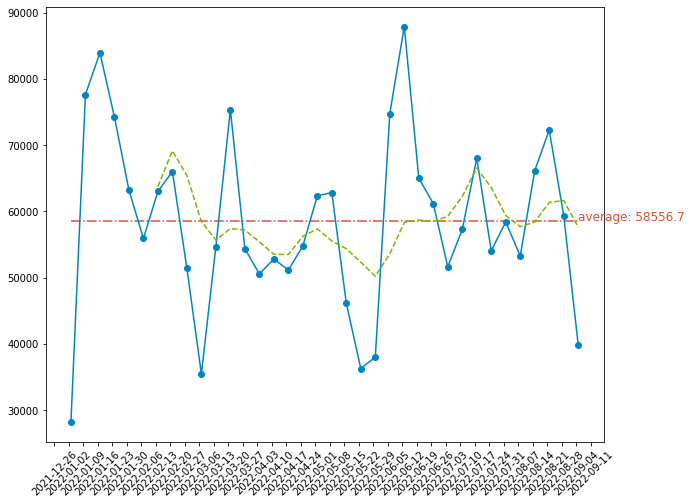

In [40]:
x = p2_clean.date
y = p2_clean['Step Count'] # define the variable
color1 = '#0085c3'
color2 = '#7ab800'
color3 = '#dc5034' # define the color
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) # set the size of the image
ax.plot(x, y, marker='o', color=color1) # draw the plot
y2 = y.rolling(7).mean() # calculate week trend
ax.plot(x, y2, ls='--', color=color2, label='week average') # draw trend
ax.hlines(y.mean(), x[0], x[-1:],
          linestyles='-.', colors=color3) # draw average
ax.text(x[-1:], y.mean()-2,
        'average: ' + str(round(y.mean(),1)),
        color=color3, fontsize=12) # indicate average
import matplotlib as mpl
xlocator = mpl.ticker.MultipleLocator(7)
ax.xaxis.set_major_locator(xlocator)
plt.xticks(rotation=45) # adjust x plot

# Conclusion

Participant1 shows willingness to walk during exam week. Step counts for exam week are above average and indicates clear sign of active.